In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [264]:
df = pd.read_csv('ANZ.csv')

In [265]:
df.dtypes

status                object
card_present_flag    float64
bpay_biller_code      object
account               object
currency              object
long_lat              object
txn_description       object
merchant_id           object
merchant_code        float64
first_name            object
balance              float64
date                  object
gender                object
age                    int64
merchant_suburb       object
merchant_state        object
extraction            object
amount               float64
transaction_id        object
country               object
customer_id           object
merchant_long_lat     object
movement              object
dtype: object

In [266]:
df.shape

(12043, 23)

In [267]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [268]:
df['customer_id'].nunique()

100

In [269]:
NA=df[['card_present_flag','bpay_biller_code','merchant_id','merchant_code','merchant_suburb','merchant_state','merchant_long_lat']]
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(NAcat.shape[1],'categorical features with missing values')
print(NAnum.shape[1],'numerical features with missing values')

5 categorical features with missing values
2 numerical features with missing values


In [270]:
df.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   account            12043 non-null  object 
 3   currency           12043 non-null  object 
 4   long_lat           12043 non-null  object 
 5   txn_description    12043 non-null  object 
 6   merchant_id        7717 non-null   object 
 7   first_name         12043 non-null  object 
 8   balance            12043 non-null  float64
 9   date               12043 non-null  object 
 10  gender             12043 non-null  object 
 11  age                12043 non-null  int64  
 12  merchant_suburb    7717 non-null   object 
 13  merchant_state     7717 non-null   object 
 14  extraction         12043 non-null  object 
 15  amount             12043 non-null  float64
 16  transaction_id     120

In [272]:
df.shape

(12043, 21)

In [273]:
df.dropna(inplace=True)

In [274]:
df.shape

(7717, 21)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             7717 non-null   object 
 1   card_present_flag  7717 non-null   float64
 2   account            7717 non-null   object 
 3   currency           7717 non-null   object 
 4   long_lat           7717 non-null   object 
 5   txn_description    7717 non-null   object 
 6   merchant_id        7717 non-null   object 
 7   first_name         7717 non-null   object 
 8   balance            7717 non-null   float64
 9   date               7717 non-null   object 
 10  gender             7717 non-null   object 
 11  age                7717 non-null   int64  
 12  merchant_suburb    7717 non-null   object 
 13  merchant_state     7717 non-null   object 
 14  extraction         7717 non-null   object 
 15  amount             7717 non-null   float64
 16  transaction_id     7717

In [174]:
df.drop(['cat_status'], axis=1, inplace=True)

KeyError: "['cat_status'] not found in axis"

In [276]:
df.shape

(7717, 21)

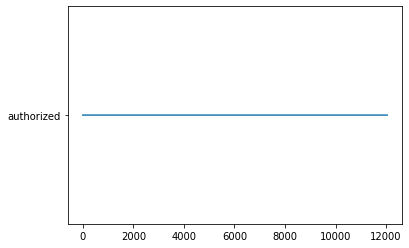

In [277]:
plt.plot(df.status)

In [278]:
df.drop(['status'], axis=1, inplace=True)

In [279]:
df.shape

(7717, 20)

In [280]:
df.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

(array([1523.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6194.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

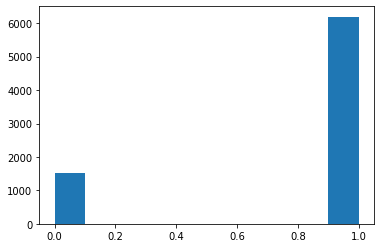

In [281]:
plt.hist(df.card_present_flag)

In [282]:
df.account.value_counts()

ACC-1598451071    531
ACC-1222300524    276
ACC-182446574     248
ACC-1037050564    220
ACC-1903037542    206
                 ... 
ACC-4059612845      9
ACC-4281711154      9
ACC-4163822186      4
ACC-1650504218      4
ACC-721712940       3
Name: account, Length: 100, dtype: int64

In [283]:
df.drop(['account'], axis=1, inplace=True)

In [284]:
df.shape

(7717, 19)

In [285]:
df.currency.value_counts()

AUD    7717
Name: currency, dtype: int64

In [286]:
df.drop(['currency'], axis=1, inplace=True)

In [287]:
df.shape

(7717, 18)

In [288]:
df.long_lat.value_counts()

153.41 -27.95    531
151.23 -33.94    276
116.06 -32.00    248
153.10 -27.66    220
153.05 -27.61    206
                ... 
144.98 -37.84      9
130.98 -12.49      9
145.01 -37.93      4
149.03 -34.97      4
145.09 -37.82      3
Name: long_lat, Length: 100, dtype: int64

In [289]:
co_ordinates = df["long_lat"].str.split(" ", n = 1, expand = True)
co_ordinates

,0,1
0,153.41,-27.95
1,153.41,-27.95
2,151.23,-33.94
3,153.10,-27.66
4,153.41,-27.95
...,...,...
12038,149.83,-29.47
12039,151.22,-33.87
12040,151.12,-33.89
12041,144.96,-37.76


In [290]:
df['longitude']=co_ordinates[0]
df['latitude']=co_ordinates[1]

In [291]:
df['longitude']=df['longitude'].astype(float)
df['latitude']=df['latitude'].astype(float)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_present_flag  7717 non-null   float64
 1   long_lat           7717 non-null   object 
 2   txn_description    7717 non-null   object 
 3   merchant_id        7717 non-null   object 
 4   first_name         7717 non-null   object 
 5   balance            7717 non-null   float64
 6   date               7717 non-null   object 
 7   gender             7717 non-null   object 
 8   age                7717 non-null   int64  
 9   merchant_suburb    7717 non-null   object 
 10  merchant_state     7717 non-null   object 
 11  extraction         7717 non-null   object 
 12  amount             7717 non-null   float64
 13  transaction_id     7717 non-null   object 
 14  country            7717 non-null   object 
 15  customer_id        7717 non-null   object 
 16  merchant_long_lat  7717

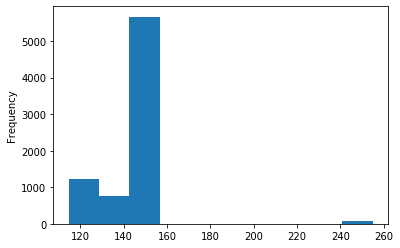

In [293]:
df['longitude'].plot(kind='hist')

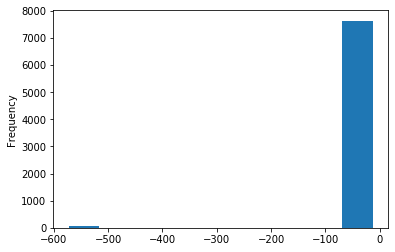

In [294]:
df['latitude'].plot(kind='hist')

In [295]:
df.drop(['long_lat'],axis=1,inplace=True)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_present_flag  7717 non-null   float64
 1   txn_description    7717 non-null   object 
 2   merchant_id        7717 non-null   object 
 3   first_name         7717 non-null   object 
 4   balance            7717 non-null   float64
 5   date               7717 non-null   object 
 6   gender             7717 non-null   object 
 7   age                7717 non-null   int64  
 8   merchant_suburb    7717 non-null   object 
 9   merchant_state     7717 non-null   object 
 10  extraction         7717 non-null   object 
 11  amount             7717 non-null   float64
 12  transaction_id     7717 non-null   object 
 13  country            7717 non-null   object 
 14  customer_id        7717 non-null   object 
 15  merchant_long_lat  7717 non-null   object 
 16  movement           7717

In [297]:
df.txn_description.value_counts()

SALES-POS    3934
POS          3783
Name: txn_description, dtype: int64

(array([3783.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3934.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

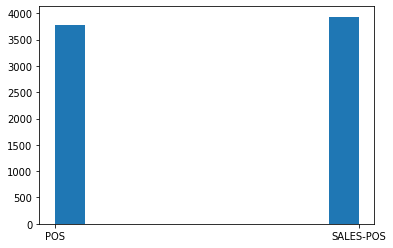

In [298]:
plt.hist(df.txn_description)

In [299]:
cleanup_txn = {"txn_description":{"POS": 1, "SALES-POS":0}}
df.replace(cleanup_txn, inplace=True)

In [300]:
df.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
6ddddc40-5b69-4253-8a26-167999a8bf96    10
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
                                        ..
d8c43a7e-a509-4a25-8070-3a7e18425571     1
a08463b0-6be6-478b-abaa-78f23f81c07b     1
72b45b15-6d63-44ff-98f0-3c2172a1b723     1
a4f2e1b9-aebb-46b8-af8c-063aaf19b013     1
b61c0a70-e9d7-4424-b5c3-af399a1e0147     1
Name: merchant_id, Length: 5725, dtype: int64

In [301]:
df.drop('merchant_id', axis=1, inplace=True)

In [302]:
df.shape

(7717, 18)

In [303]:
df.first_name.value_counts()

Diana       531
Michael     519
Jeffrey     316
Joseph      306
Jessica     286
           ... 
David        14
Jonathan      9
Karen         4
Marissa       4
Andrew        3
Name: first_name, Length: 80, dtype: int64

In [304]:
df.balance.value_counts()

4990.31     2
6630.94     2
3808.18     2
2321.06     2
2786.80     2
           ..
21478.35    1
4733.21     1
11507.30    1
47894.07    1
0.25        1
Name: balance, Length: 7698, dtype: int64

(array([7.117e+03, 3.150e+02, 1.600e+02, 7.000e+00, 2.100e+01, 0.000e+00,
        3.000e+00, 7.700e+01, 0.000e+00, 1.700e+01]),
 array([2.40000000e-01, 2.67095820e+04, 5.34189240e+04, 8.01282660e+04,
        1.06837608e+05, 1.33546950e+05, 1.60256292e+05, 1.86965634e+05,
        2.13674976e+05, 2.40384318e+05, 2.67093660e+05]),
 <a list of 10 Patch objects>)

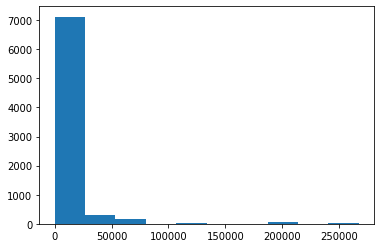

In [305]:
plt.hist(df.balance)

In [306]:
df=df[df['balance']<100000]

(array([4648., 1648.,  617.,  206.,  112.,   61.,  114.,   40.,   92.,
          54.]),
 array([2.4000000e-01, 6.9646930e+03, 1.3929146e+04, 2.0893599e+04,
        2.7858052e+04, 3.4822505e+04, 4.1786958e+04, 4.8751411e+04,
        5.5715864e+04, 6.2680317e+04, 6.9644770e+04]),
 <a list of 10 Patch objects>)

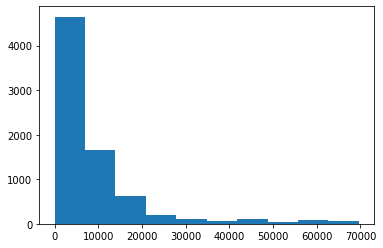

In [307]:
plt.hist(df.balance)

In [308]:
df.date.value_counts()

9/1/2018      109
9/28/2018     108
9/21/2018     105
8/17/2018     105
9/29/2018     104
             ... 
8/6/2018       53
10/16/2018     50
10/8/2018      49
10/30/2018     49
10/23/2018     48
Name: date, Length: 91, dtype: int64

In [309]:
df['date']= pd.to_datetime(df['date']) 
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7592 entries, 0 to 12042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   card_present_flag  7592 non-null   float64       
 1   txn_description    7592 non-null   int64         
 2   first_name         7592 non-null   object        
 3   balance            7592 non-null   float64       
 4   date               7592 non-null   datetime64[ns]
 5   gender             7592 non-null   object        
 6   age                7592 non-null   int64         
 7   merchant_suburb    7592 non-null   object        
 8   merchant_state     7592 non-null   object        
 9   extraction         7592 non-null   object        
 10  amount             7592 non-null   float64       
 11  transaction_id     7592 non-null   object        
 12  country            7592 non-null   object        
 13  customer_id        7592 non-null   object        
 14  merchan

In [311]:
df.year.value_counts()

2018    7592
Name: year, dtype: int64

In [312]:
df.month.value_counts()

9     2560
10    2526
8     2506
Name: month, dtype: int64

In [313]:
df.gender.value_counts()

M    3810
F    3782
Name: gender, dtype: int64

(array([3782.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3810.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

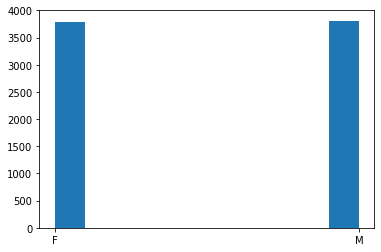

In [314]:
plt.hist(df.gender)

In [315]:
cleanup_gender = {'gender':{'F':0, 'M':1}}
df.replace(cleanup_gender, inplace=True)

(array([2045., 2252., 1207., 1328.,  523.,  122.,    0.,   59.,   53.,
           3.]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <a list of 10 Patch objects>)

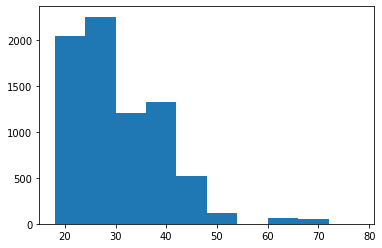

In [316]:
plt.hist(df.age)

In [317]:
df['merchant_suburb'].nunique()

1587

In [318]:
df['merchant_state'].value_counts()

NSW    2153
VIC    2044
QLD    1538
WA     1100
SA      414
NT      205
ACT      73
TAS      65
Name: merchant_state, dtype: int64

In [319]:
df.extraction.value_counts()

2018-10-17T04:07:35.000+0000    1
2018-10-03T11:36:08.000+0000    1
2018-10-07T21:58:35.000+0000    1
2018-10-14T13:03:51.000+0000    1
2018-10-23T09:38:00.000+0000    1
                               ..
2018-10-26T13:05:39.000+0000    1
2018-08-08T15:19:24.000+0000    1
2018-10-29T13:31:21.000+0000    1
2018-10-14T21:16:46.000+0000    1
2018-09-28T16:00:39.000+0000    1
Name: extraction, Length: 7592, dtype: int64

In [320]:
df.drop(['extraction'],axis=1,inplace=True)

(array([7.556e+03, 2.500e+01, 5.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000000e-01, 7.081990e+02, 1.416298e+03, 2.124397e+03,
        2.832496e+03, 3.540595e+03, 4.248694e+03, 4.956793e+03,
        5.664892e+03, 6.372991e+03, 7.081090e+03]),
 <a list of 10 Patch objects>)

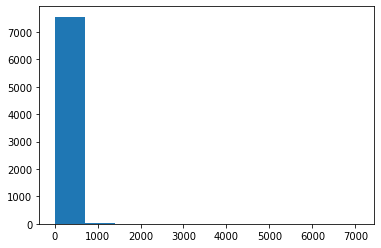

In [321]:
plt.hist(df.amount)

In [322]:
df.amount.max()

7081.09

In [323]:
df.amount.min()

0.1

In [324]:
perc =[.80,.90,.99] 
df.amount.describe(percentiles=perc)

count    7592.000000
mean       39.738494
std       149.236864
min         0.100000
50%        19.510000
80%        38.868000
90%        60.469000
99%       377.877300
max      7081.090000
Name: amount, dtype: float64

In [325]:
df=df[df['amount']<378]

In [326]:
df['transaction_id'].value_counts()

421ae381279443fbab8ee5655071a78d    1
25b1aca58a2441aab0bcb0474437d4aa    1
9c0d93fddec743b0bbb4eaef19345679    1
52b0671095764373a909c3f0993984f2    1
9ccf19960ede4002968ea7ebb34dcf62    1
                                   ..
02729a53617d48728b512a4de88034ce    1
d59e4d5cf89b4f8fa20317a2a9f89fbf    1
08e43778fff94f0382b1323688d95589    1
44f119b4df9a4f2d8b9f02025b074b2e    1
268f53ff6a384304ad9b2b9bc1eb0292    1
Name: transaction_id, Length: 7516, dtype: int64

In [327]:
df.drop(['transaction_id'],axis=1,inplace=True)

In [328]:
df['country'].value_counts()

Australia    7516
Name: country, dtype: int64

In [329]:
df.drop(['country'],axis=1,inplace=True)

In [330]:
df['customer_id'].value_counts()

CUS-2487424745    529
CUS-2142601169    272
CUS-3026014945    247
CUS-1614226872    220
CUS-860700529     205
                 ... 
CUS-495599312       9
CUS-3151318058      8
CUS-2500783281      4
CUS-2630892467      4
CUS-1646183815      3
Name: customer_id, Length: 97, dtype: int64

In [331]:
df.drop(['customer_id'],axis=1,inplace=True)

In [332]:
df['merchant_long_lat'].value_counts()

151.21 -33.87    137
144.96 -37.82     82
144.97 -37.81     58
144.96 -37.81     56
153.02 -27.47     46
                ... 
153.04 -27.56      1
138.59 -34.97      1
153.37 -28.05      1
153.02 -26.69      1
151.03 -33.75      1
Name: merchant_long_lat, Length: 2651, dtype: int64

In [333]:
df.drop(['merchant_long_lat'],axis=1,inplace=True)

In [334]:
df['movement'].value_counts()

debit    7516
Name: movement, dtype: int64

In [335]:
df.drop(['movement'],axis=1,inplace=True)

In [336]:
df.drop('year', axis=1, inplace=True)

In [337]:
df.drop('date', axis=1, inplace=True)

In [338]:
df.head()

,card_present_flag,txn_description,first_name,balance,gender,age,merchant_suburb,merchant_state,amount,longitude,latitude,month
0,1.0,1,Diana,35.39,0,26,Ashmore,QLD,16.25,153.41,-27.95,8
1,0.0,0,Diana,21.20,0,26,Sydney,NSW,14.19,153.41,-27.95,8
2,1.0,1,Michael,5.71,1,38,Sydney,NSW,6.42,151.23,-33.94,8
3,1.0,0,Rhonda,2117.22,0,40,Buderim,QLD,40.90,153.10,-27.66,8
4,1.0,0,Diana,17.95,0,26,Mermaid Beach,QLD,3.25,153.41,-27.95,8


In [339]:
corr = df.corr()
corr

,card_present_flag,txn_description,balance,gender,age,amount,longitude,latitude,month
card_present_flag,1.000000,-0.006021,-0.002436,0.000511,-0.008085,-0.001202,-0.010645,0.001070,-0.001662
txn_description,-0.006021,1.000000,-0.012520,-0.015362,0.000782,-0.020087,-0.008354,0.004817,0.005620
balance,-0.002436,-0.012520,1.000000,0.225084,0.033425,0.075426,-0.072155,0.014728,0.181159
gender,0.000511,-0.015362,0.225084,1.000000,-0.003537,0.015499,0.192785,-0.110725,0.011094
age,-0.008085,0.000782,0.033425,-0.003537,1.000000,0.072137,0.062846,0.067668,0.013799
amount,-0.001202,-0.020087,0.075426,0.015499,0.072137,1.000000,0.062947,-0.087570,0.010401
longitude,-0.010645,-0.008354,-0.072155,0.192785,0.062846,0.062947,1.000000,-0.669534,-0.003871
latitude,0.001070,0.004817,0.014728,-0.110725,0.067668,-0.087570,-0.669534,1.000000,0.029406
month,-0.001662,0.005620,0.181159,0.011094,0.013799,0.010401,-0.003871,0.029406,1.000000


In [340]:
import seaborn as sns

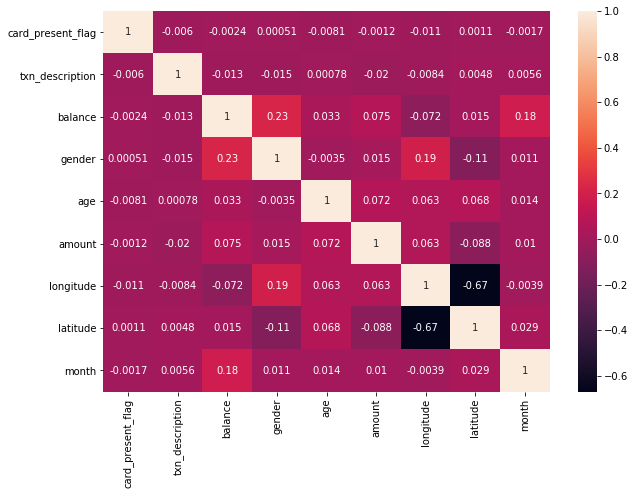

In [341]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.show()